<a href="https://colab.research.google.com/github/marihatabassum/Python_Data_Analysis_Projects/blob/for-freecodecamp-python-projects/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import numpy as np


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Instructions

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

By each number in the medical_data_visualizer.py file, add the code from the associated instruction number below.

   1. Import the data from medical_examination.csv and assign it to the df variable.
   2. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
   3. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
   4. Draw the Categorical Plot in the draw_cat_plot function.
   5.  Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
   6.  Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    7.  Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
    8. Get the figure for the output and store it in the fig variable.
    9.  Do not modify the next two lines.
    10. Draw the Heat Map in the draw_heat_map function.
    11.  Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:

       -> diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

       -> height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

       -> height is more than the 97.5th percentile

       ->weight is less than the 2.5th percentile

       -> weight is more than the 97.5th percentile

   12. Calculate the correlation matrix and store it in the corr variable.
   13. Generate a mask for the upper triangle and store it in the mask variable.
   14. Set up the matplotlib figure.
   15. Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().
   16. Do not modify the next two lines.

Development

Write your code in medical_data_visualizer.py. For development, you can use main.py to test your code.

In [ ]:
template=pd.read_csv("/content/drive/MyDrive/FreeCodeCamp Courses/data analysis with python projects/medical_examination_template.csv")
template

,Feature,Variable Type,Variable,Value Type
0,Age,Objective Feature,age,int (days)
1,Height,Objective Feature,height,int (cm)
2,Weight,Objective Feature,weight,float (kg)
3,Gender,Objective Feature,gender,categorical code
4,Systolic blood pressure,Examination Feature,ap_hi,int
5,Diastolic blood pressure,Examination Feature,ap_lo,int
6,Cholesterol,Examination Feature,cholesterol,"1: normal, 2: above normal, 3: well above normal"
7,Glucose,Examination Feature,gluc,"1: normal, 2: above normal, 3: well above normal"
8,Smoking,Subjective Feature,smoke,binary
9,Alcohol intake,Subjective Feature,alco,binary


In [ ]:
# Q1, done

df=pd.read_csv("/content/drive/MyDrive/FreeCodeCamp Courses/data analysis with python projects/medical_examination.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Q2: Add an overweight column to the data.
#To determine if a person is overweight, first calculate their BMI
#by dividing their weight in kilograms by the square of their height in meters.

df["BMI"]=df["weight"]/(df["height"]*0.01)*2

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,73.809524
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,108.974359
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,77.575758
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,97.041420
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,71.794872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,90.476190
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,159.493671
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,114.754098
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,88.343558


In [ ]:
df[df['BMI']<=25]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
29488,42156,20408,2,177,22.0,120,80,1,1,1,1,1,0,24.858757
33817,48318,21582,2,178,11.0,130,90,1,1,0,0,1,1,12.359551
57858,82567,18804,2,165,10.0,180,1100,2,2,0,0,1,1,12.121212


In [ ]:

#Q2: If that value is > 25 then the person is overweight.
#Use the value 0 for NOT overweight and the value 1 for overweight.


#df[df['overweight']>25]
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,73.809524,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,108.974359,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,77.575758,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,97.041420,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,71.794872,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,90.476190,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,159.493671,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,114.754098,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,88.343558,1


In [ ]:
df[df['overweight']==0]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
29488,42156,20408,2,177,22.0,120,80,1,1,1,1,1,0,24.858757,0
33817,48318,21582,2,178,11.0,130,90,1,1,0,0,1,1,12.359551,0
57858,82567,18804,2,165,10.0,180,1100,2,2,0,0,1,1,12.121212,0


In [ ]:
#Q3 Normalize data by making 0 always good and 1 always bad.
#If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

df['gluc_check']=df['gluc'].apply(lambda x: 1  if x>1 else 0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight,gluc_check
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,73.809524,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,108.974359,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,77.575758,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,97.041420,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,71.794872,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,90.476190,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,159.493671,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,114.754098,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,88.343558,1,1


<Figure size 800x600 with 0 Axes>

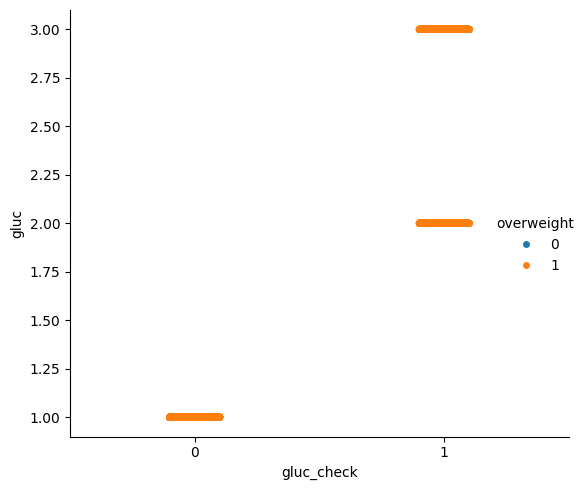

In [ ]:
#Q4: Draw the Categorical Plot in the draw_cat_plot function.

def draw_cat_plot(data, x, y=None, hue=None):
  plt.figure(figsize=(8, 6))
  sns.catplot(data=df, x=x, y=y, hue=hue)
  plt.tight_layout()
  plt.show()

draw_cat_plot(data=df, x="gluc_check", y='gluc', hue='overweight')

In [ ]:
#Q5: Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
df_cat=pd.melt(df, id_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'])
df_cat

,cholesterol,gluc,smoke,alco,active,cardio,overweight,variable,value
0,1,1,0,0,1,0,1,id,0.0
1,3,1,0,0,1,1,1,id,1.0
2,3,1,0,0,0,1,1,id,2.0
3,1,1,0,0,1,1,1,id,3.0
4,1,1,0,0,0,0,1,id,4.0
...,...,...,...,...,...,...,...,...,...
629995,1,1,1,0,1,0,1,gluc_check,0.0
629996,2,2,0,0,1,1,1,gluc_check,1.0
629997,3,1,0,1,0,1,1,gluc_check,0.0
629998,1,2,0,0,0,1,1,gluc_check,1.0


In [ ]:
#Q6: Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature.
# You will have to rename one of the columns for the catplot to work correctly.

df_cat_cardio = pd.melt(df, id_vars=['cardio'],
                          value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat_cardio


,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,3
2,1,cholesterol,3
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [ ]:
df_cat_counts = df_cat_cardio.groupby(['variable', 'value', 'cardio']).size().reset_index(name='total')
df_cat_counts

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,1,0,29330
9,cholesterol,1,1,23055


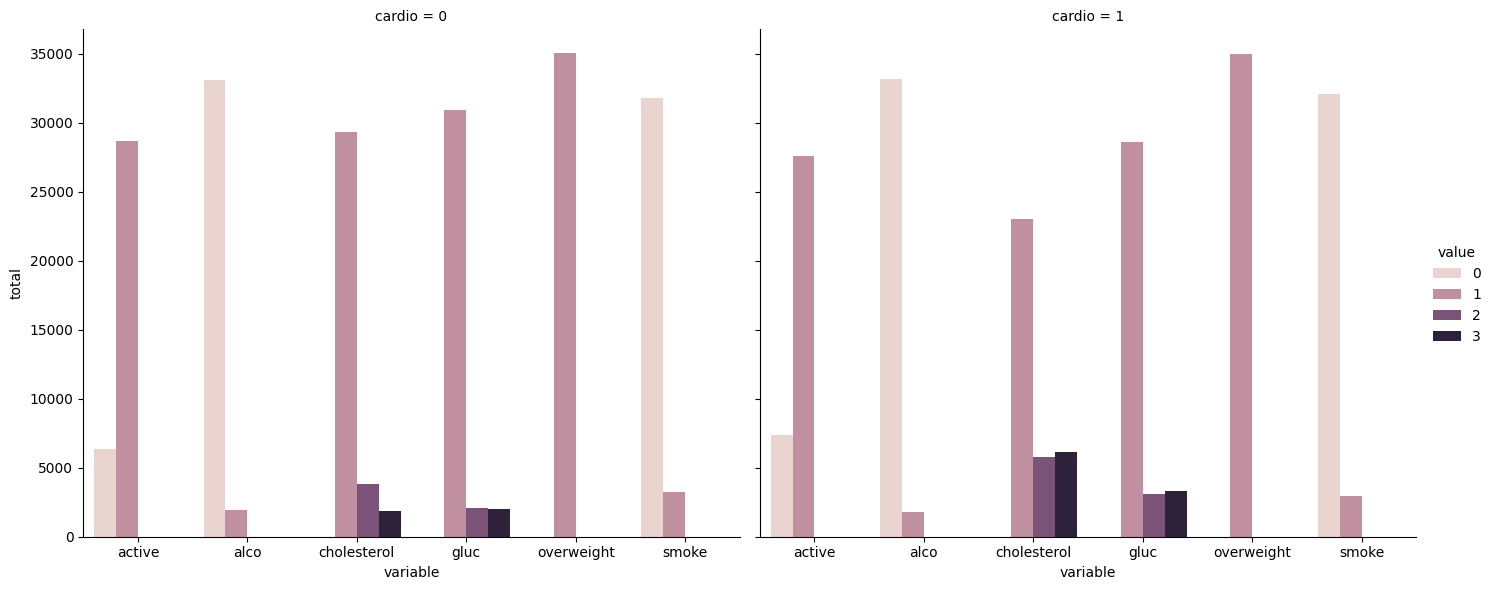

In [ ]:
#Q7: Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat_counts, kind='bar', height=6, aspect=1.2)
plt.show()


In [ ]:
#Q8: Get the figure for the output and store it in the fig variable.
# Done

In [ ]:
#Q9: Do not modify the next two lines.
#  Done

In [ ]:
df_cat_counts.dtypes

,0
variable,object
value,int64
cardio,int64
total,int64


<Axes: >

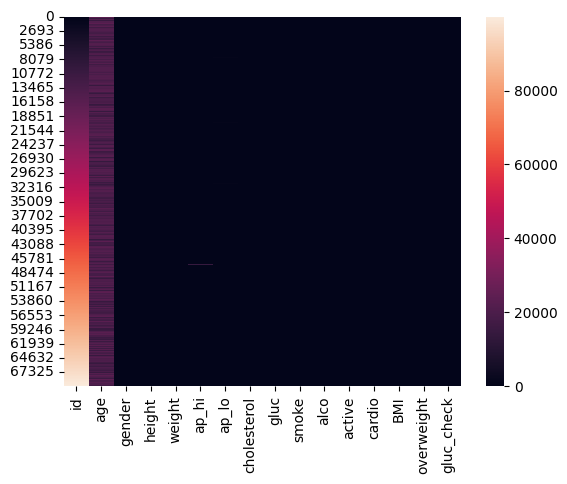

In [ ]:
sns.heatmap(df)

<Axes: >

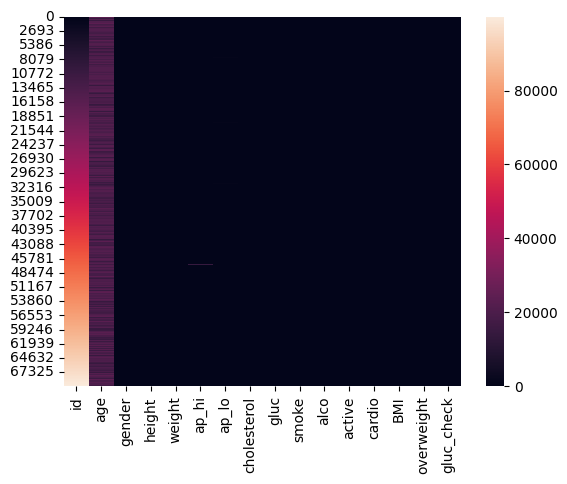

In [ ]:
#Q10: Draw the Heat Map in the draw_heat_map function.

def draw_heat_map(data):
  fig=sns.heatmap(data)
  return fig
draw_heat_map(df)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight,gluc_check
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,73.809524,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,108.974359,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,77.575758,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,97.041420,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,71.794872,1,0


In [ ]:
#Q11:  Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:

#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
#height is more than the 97.5th percentile
#weight is less than the 2.5th percentile
#weight is more than the 97.5th percentile

df_heat=df[df['ap_lo']<=df['ap_hi']]
df_heat.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight,gluc_check
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,73.809524,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,108.974359,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,77.575758,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,97.041420,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,71.794872,1,0


In [ ]:
height_lower_bound=df['height'].quantile(0.025)
height_upper_bound=df['height'].quantile(0.975)
weight_lower_bound=df['weight'].quantile(0.025)
weight_upper_bound=df['weight'].quantile(0.975)
weight_upper_bound

np.float64(108.0)

In [ ]:
df_heat=df_heat[(df_heat['height']>=height_lower_bound) & (df_heat['height']<=height_upper_bound)]

df_heat=df_heat[(df_heat['weight']>=weight_lower_bound) & (df_heat['weight']<=weight_upper_bound)]
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight,gluc_check
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,73.809524,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,108.974359,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,77.575758,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,97.041420,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,71.794872,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,81.395349,1,0
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,96.969697,1,0
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,90.476190,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,88.343558,1,1


In [ ]:
#Q12: Calculate the correlation matrix and store it in the corr variable.
corr=df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight,gluc_check
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.005581,0.002242,-0.002732,-0.000708,0.005891,0.003900,0.000050,NaN,0.002289
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970,-0.011445,0.240241,0.093640,NaN,0.086990
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.038756,-0.023419,0.337436,0.168637,0.007864,0.002320,-0.004966,NaN,-0.021357
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785,-0.005661,-0.024102,-0.010434,NaN,-0.030469
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917,-0.014430,0.170042,0.964339,NaN,0.107072
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769,-0.000222,0.050556,0.026873,NaN,0.011111
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042,0.001569,0.327181,0.230248,NaN,0.074840
cholesterol,0.005581,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050,0.007381,0.219090,0.159973,NaN,0.408480
gluc,0.002242,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805,-0.007709,0.087621,0.104832,NaN,0.941387
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200,0.026940,-0.020345,0.006864,NaN,-0.004157


In [ ]:
#Q13:  Generate a mask for the upper triangle and store it in the mask variable.

np.triu(np.ones_like(corr, dtype=bool))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  Tru

<Figure size 2000x1500 with 0 Axes>

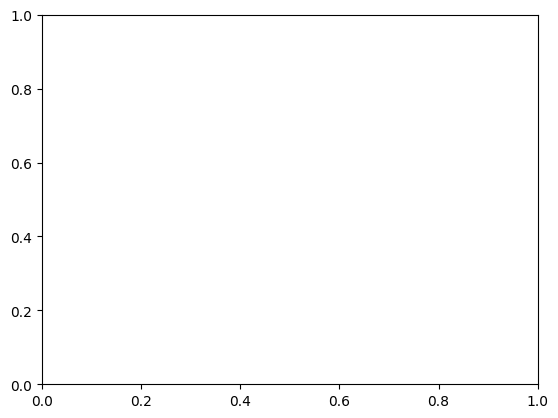

In [ ]:
#Q14: Set up the matplotlib figure.

fig = plt.figure(figsize=(20, 15))             # an empty figure with no Axes
fig, ax = plt.subplots()
 # a figure with a single Axes

<Axes: >

<Figure size 5000x4000 with 0 Axes>

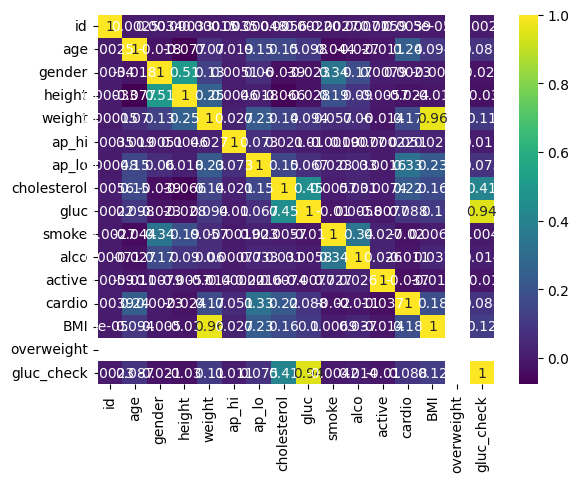

In [ ]:
#Q15: Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().
fig = plt.figure(figsize=(50, 40))             # an empty figure with no Axes
fig, ax = plt.subplots()
 # a figure with a single Axes
sns.heatmap(corr, annot=True, cmap="viridis")

In [ ]:
#Q16: Do not modify the next two lines.